In [1]:
library(ggplot2)
library(tidyverse)
library(lubridate)
library(Seurat)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Attaching SeuratObject

‘SeuratObject’ was built with package ‘Matrix’ 1.6.1.1 but the current
version is 1.6.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed



In [13]:
filename <- "/gpfs/home/meyin/published_data/parabiosis/pb_combined.rds?download=1"
data <- readRDS(filename)

In [14]:
head(data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.15,seurat_clusters,RNA_snn_res.0.25,RNA_snn_res.0.5,LMO_maxID,LMO_secondID,⋯,Experiment,nGene,nUMI,percent.mito,res.0.2,SCT_snn_res.0.5,SCT_snn_res.0.6,SCT_snn_res.0.55,SCT_snn_res.0.52,SCT_snn_res.0.53
,<chr>,<dbl>,<int>,<dbl>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<int>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>
20_AAACCCATCGGTAGGA-1_1,GEX1,5461,2259,3.918696,3,3,3,3,BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC,BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG,⋯,2020,NA,NA,NA,NA,1,2,1,1,3
20_AAACGAACAACCAACT-1_1,GEX1,7542,2698,4.627420,1,7,4,4,BC3-Old-Iso-20.50-6A-B1-35260-CTCTAGAC,BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC,⋯,2020,NA,NA,NA,NA,5,5,5,4,7
20_AAACGAACAGGTTCAT-1_1,GEX1,15424,3461,3.060166,0,8,7,8,BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC,BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG,⋯,2020,NA,NA,NA,NA,0,7,0,0,8
20_AAACGAACATGGAACG-1_1,GEX1,11212,3462,4.584374,5,6,4,6,BC3-Old-Iso-20.50-6A-B1-35260-CTCTAGAC,BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC,⋯,2020,NA,NA,NA,NA,7,8,7,4,6
20_AAACGAAGTTGCGGCT-1_1,GEX1,10125,3303,3.348148,4,9,5,5,BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG,BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC,⋯,2020,NA,NA,NA,NA,8,10,8,7,9
20_AAACGAATCGTTCATT-1_1,GEX1,7902,2773,3.809162,3,3,3,3,BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG,BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG,⋯,2020,NA,NA,NA,NA,1,2,1,1,3
20_AAACGCTAGCCTAACT-1_1,GEX1,4324,1829,3.075856,3,3,3,3,BC3-Old-Iso-20.50-6A-B1-35260-CTCTAGAC,BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG,⋯,2020,NA,NA,NA,NA,1,2,1,1,3
20_AAACGCTAGCGACCCT-1_1,GEX1,13439,3710,5.305454,1,6,4,4,BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC,BC5-Old-Iso-20.50-9A-B1-24388-AGTTGCGT,⋯,2020,NA,NA,NA,NA,7,8,7,4,6
20_AAACGCTAGGTAGTCG-1_1,GEX1,8253,2821,4.640737,1,7,1,4,BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC,BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC,⋯,2020,NA,NA,NA,NA,5,5,5,4,7


In [15]:
data@meta.data <- data@meta.data %>%
  mutate(ID = sub("-.*", "", hash.ID))

In [16]:
data@meta.data <- data@meta.data %>%
  mutate(AgeCond = paste0(substr(Age, 1, 1), "_", Type))

In [18]:
table(data$AgeCond)


NA_NA O_Het O_Iso Y_Het Y_Iso 
11771  3363  2620  4118  3723 

In [20]:
ocontroldistributions <- as.data.frame(table(subset(data, subset = AgeCond == "O_Iso")$Celltype))
oexercisedistributions <- as.data.frame(table(subset(data, subset = AgeCond == "O_Het")$Celltype))
ycontroldistributions <- as.data.frame(table(subset(data, subset = AgeCond == "Y_Iso")$Celltype))
yexercisedistributions <- as.data.frame(table(subset(data, subset = AgeCond == "Y_Het")$Celltype))

In [21]:
ocontroldistributions <- ocontroldistributions[ocontroldistributions$Var1 != "Doublet", ]
oexercisedistributions <- oexercisedistributions[oexercisedistributions$Var1 != "Doublet", ]
ycontroldistributions <- ycontroldistributions[ycontroldistributions$Var1 != "Doublet", ]
yexercisedistributions <- yexercisedistributions[yexercisedistributions$Var1 != "Doublet", ]

In [23]:
colnames(ocontroldistributions)[1] <- "Cell_Type"

colnames(oexercisedistributions)[1] <- "Cell_Type"

colnames(ycontroldistributions)[1] <- "Cell_Type"

colnames(yexercisedistributions)[1] <- "Cell_Type"

In [25]:
ocontroldistributions$Group <- 'O_Control'
oexercisedistributions$Group <- 'O_Exercise'
ycontroldistributions$Group <- 'Y_Control'
yexercisedistributions$Group <- 'Y_Exercise'

In [54]:
distributions <- rbind(ocontroldistributions, oexercisedistributions)
distributions <- rbind(distributions, ycontroldistributions)
distributions <- rbind(distributions, yexercisedistributions)

In [55]:
head(distributions)

,Cell_Type,Freq,Group
,<fct>,<int>,<chr>
1,Oligodendro,843,O_Control
2,Microglia,749,O_Control
3,Endothelial,271,O_Control
4,Astrocyte_qNSC,405,O_Control
5,Neuroblast,128,O_Control
6,aNSC_NPC,91,O_Control


In [56]:
distributions <- distributions %>%
                      group_by(Group) %>%
                      mutate(totalFreq = sum(Freq)) %>%
                      mutate(Percent = Freq / totalFreq * 100) %>%
                      ungroup() %>%
                      select(-totalFreq)

In [60]:
distributions <- transform(distributions, Cell_Type = as.character(Cell_Type)) 

In [61]:
cellorder <- c("Microglia", "Astrocyte_qNSC", "Endothelial", "Neuroblast", "Oligodendro", "aNSC_NPC", "Mural", "OPC", "Macrophage_Tcell_NK", "Neuron", "Ependymal")

distributions$Cell_Type <- factor(distributions$Cell_Type, levels = cellorder, ordered = TRUE)


In [44]:
distributions <- distributions[order(distributions$Cell_Type),]

In [65]:
cell_type_colors <- c(
    "Microglia" = "#F8766D",
    "Astrocyte_qNSC" = "#e48900ff", 
    "Endothelial" = "#c39a01ff", 
    "Neuroblast" = "#99a801ff", 
    "Oligodendro" = "#53b400ff",
    "aNSC_NPC" = "#00bc57ff",
    "Mural" = "#00c094ff",
    "OPC" = "#03bfc4ff",
    "Macrophage_Tcell_NK" = "#01a4ffff",
    "Neuron" = "#df70f8ff",
    "Ependymal" = "#ff66a8ff")

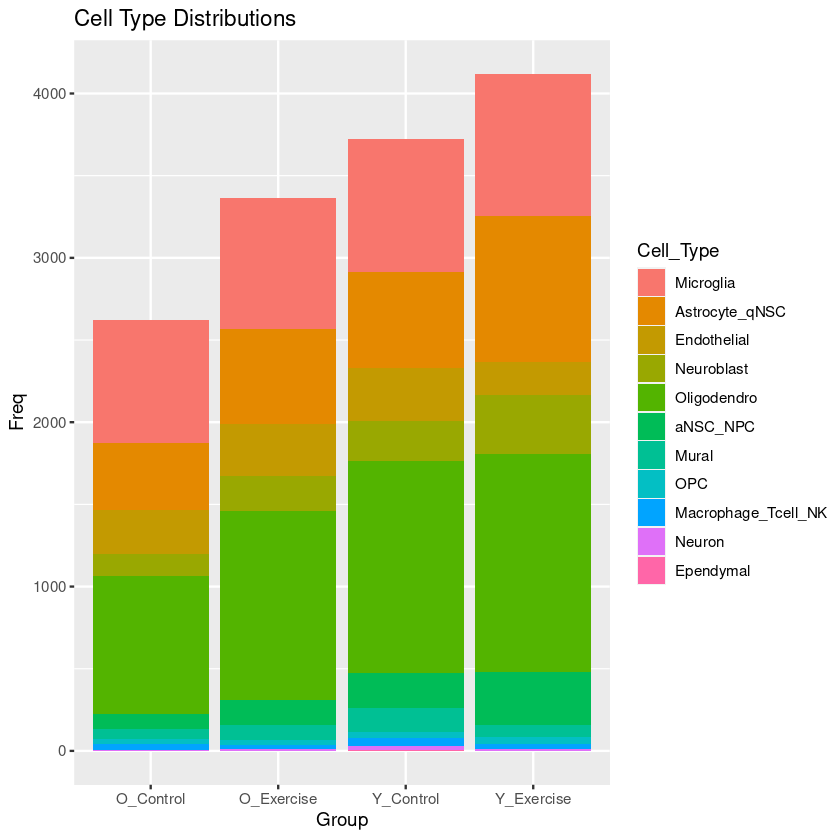

In [66]:
distributions %>% 
 ggplot(aes(fill = Cell_Type, x = Group, y = Freq)) + 
 geom_bar(position = "stack", stat = "identity") + 
 labs(title = "Cell Type Distributions") +
 scale_fill_manual(values = cell_type_colors)


In [69]:
plot <- distributions %>% 
 ggplot(aes(fill = Cell_Type, x = Group, y = Percent)) + 
 geom_bar(position = "stack", stat = "identity")+
 labs(title = "Cell Type Percentage Distributions")+
 scale_fill_manual(values = cell_type_colors)


In [70]:
ggsave("figures/CellTypeDistributions.png", plot)

Saving 6.67 x 6.67 in image
